In [1]:
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
import math
from sklearn.metrics import f1_score, accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import matplotlib.pyplot as mt

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.externals import joblib

In [2]:
filename='./german_credit.csv'
data = pd.read_csv(filename)

data.columns

Y=data['Creditability']
X=data.drop(['Creditability'],axis=1)

print(X.shape,Y.shape)

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=27)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1000, 20) (1000,)
(800, 20) (200, 20) (800,) (200,)


In [3]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

# model.get_params(deep=True)

ytrainPredicted=model.predict(X_train)
ytestPredicted=model.predict(X_test)
print('trainAccuracy:',accuracy_score(Y_train,ytrainPredicted),' testAccuracy:',accuracy_score(Y_test,ytestPredicted))

# import graphviz 
# dot_data = export_graphviz(model, out_file='./out.dot') 
# graph = graphviz.Source(dot_data) 

trainAccuracy: 1.0  testAccuracy: 0.71


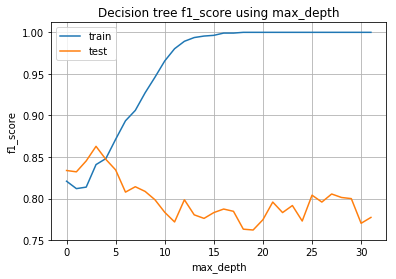

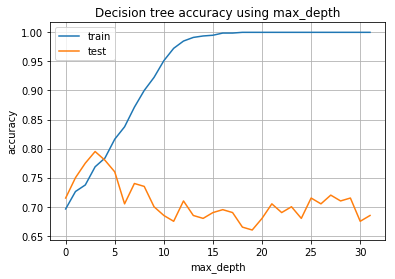

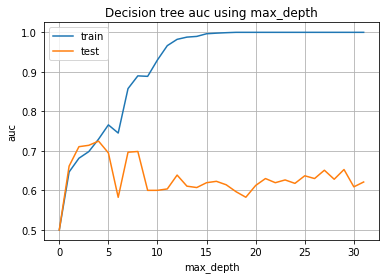

In [4]:
depth=np.linspace(1,32,32)
train_depth_f1=[]
test_depth_f1=[]
train_depth_accuracy=[]
test_depth_accuracy=[]

train_depth_auc=[]
test_depth_auc=[]

for i in depth:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    
    ytrainPredicted=model.predict(X_train)
    ytestPredicted=model.predict(X_test)
    
    train_f1=f1_score(Y_train,ytrainPredicted)
    test_f1=f1_score(Y_test,ytestPredicted)

    train_depth_f1.append(train_f1)
    test_depth_f1.append(test_f1)
    train_depth_accuracy.append(accuracy_score(Y_train,ytrainPredicted))
    test_depth_accuracy.append(accuracy_score(Y_test,ytestPredicted))
    
    FP,TP,thresholds=roc_curve(Y_train,ytrainPredicted)
    train_depth_auc.append(auc(FP,TP))
    FP,TP,thresholds=roc_curve(Y_test,ytestPredicted)
    test_depth_auc.append(auc(FP,TP))


mt.title('Decision tree f1_score using max_depth')
mt.plot(range(len(train_depth_f1)),train_depth_f1,label='train')
mt.plot(range(len(test_depth_f1)),test_depth_f1,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_depth')
mt.ylabel('f1_score')
mt.show()

mt.title('Decision tree accuracy using max_depth')
mt.plot(range(len(train_depth_accuracy)),train_depth_accuracy,label='train')
mt.plot(range(len(test_depth_accuracy)),test_depth_accuracy,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_depth')
mt.ylabel('accuracy')
mt.show()

mt.title('Decision tree auc using max_depth')
mt.plot(range(len(train_depth_auc)),train_depth_auc,label='train')
mt.plot(range(len(test_depth_auc)),test_depth_auc,label='test')
mt.legend()
mt.grid()
mt.xlabel('max_depth')
mt.ylabel('auc')
mt.show()
    

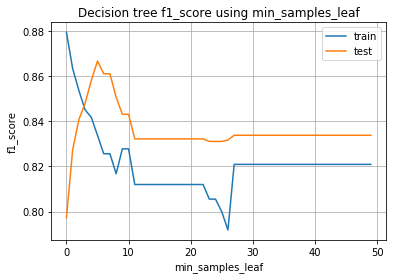

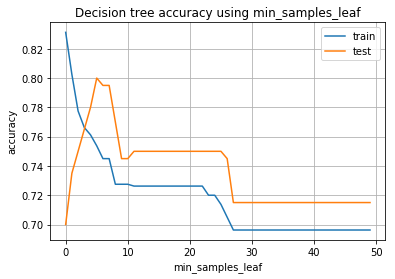

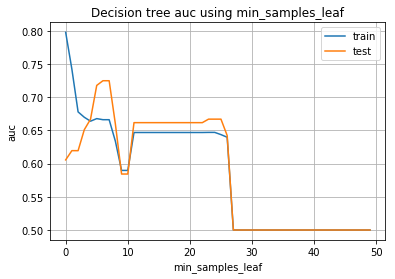

In [5]:
minSamplesLeaf=np.linspace(0.01,0.5,50)
# minSamplesLeaf=np.linspace(0.01,0.5,50,dtype=None)
train_minSamplesLeaf_f1=[]
test_minSamplesLeaf_f1=[]
train_minSamplesLeaf_accuracy=[]
test_minSamplesLeaf_accuracy=[]


train_minSamplesLeaf_auc=[]
test_minSamplesLeaf_auc=[]

for i in minSamplesLeaf:
# for i in range(1,50):
    model=DecisionTreeClassifier(min_samples_leaf=i)
    model.fit(X_train,Y_train)
    
    ytrainPredicted=model.predict(X_train)
    ytestPredicted=model.predict(X_test)
    
    train_f1=f1_score(Y_train,ytrainPredicted)
    test_f1=f1_score(Y_test,ytestPredicted)
    
    train_minSamplesLeaf_f1.append(train_f1)
    test_minSamplesLeaf_f1.append(test_f1)
    train_minSamplesLeaf_accuracy.append(accuracy_score(Y_train,ytrainPredicted))
    test_minSamplesLeaf_accuracy.append(accuracy_score(Y_test,ytestPredicted))

    FP,TP,thresholds=roc_curve(Y_train,ytrainPredicted)
    train_minSamplesLeaf_auc.append(auc(FP,TP))
    FP,TP,thresholds=roc_curve(Y_test,ytestPredicted)
    test_minSamplesLeaf_auc.append(auc(FP,TP))

mt.title('Decision tree f1_score using min_samples_leaf')
mt.plot(range(len(train_minSamplesLeaf_f1)),train_minSamplesLeaf_f1,label='train')
mt.plot(range(len(test_minSamplesLeaf_f1)),test_minSamplesLeaf_f1,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_leaf')
mt.ylabel('f1_score')
mt.show()

mt.title('Decision tree accuracy using min_samples_leaf')
mt.plot(range(len(train_minSamplesLeaf_accuracy)),train_minSamplesLeaf_accuracy,label='train')
mt.plot(range(len(test_minSamplesLeaf_accuracy)),test_minSamplesLeaf_accuracy,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_leaf')
mt.ylabel('accuracy')
mt.show()

mt.title('Decision tree auc using min_samples_leaf')
mt.plot(range(len(train_minSamplesLeaf_auc)),train_minSamplesLeaf_auc,label='train')
mt.plot(range(len(test_minSamplesLeaf_auc)),test_minSamplesLeaf_auc,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_leaf')
mt.ylabel('auc')
mt.show()

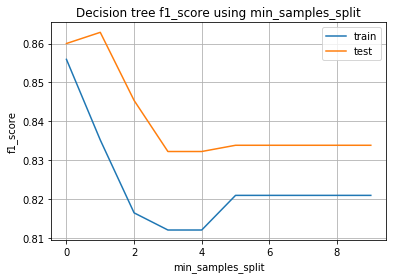

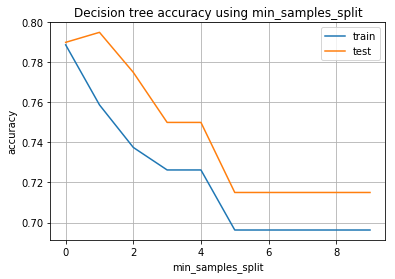

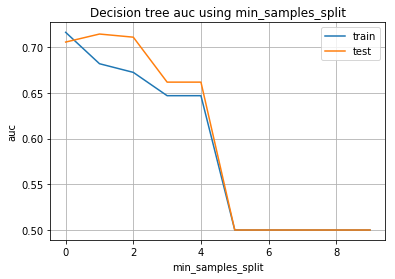

In [6]:
minSamplesSplit=np.linspace(0.1,1.0,10,dtype=None)
train_minSamplesSplit_f1=[]
test_minSamplesSplit_f1=[]
train_minSamplesSplit_accuracy=[]
test_minSamplesSplit_accuracy=[]

train_minSamplesSplit_auc=[]
test_minSamplesSplit_auc=[]
for i in minSamplesSplit:
    model=DecisionTreeClassifier(min_samples_split=i)
    model.fit(X_train,Y_train)
    
    ytrainPredicted=model.predict(X_train)
    ytestPredicted=model.predict(X_test)
    
    train_f1=f1_score(Y_train,ytrainPredicted)
    test_f1=f1_score(Y_test,ytestPredicted)
    
    train_minSamplesSplit_f1.append(train_f1)
    test_minSamplesSplit_f1.append(test_f1)
    train_minSamplesSplit_accuracy.append(accuracy_score(Y_train,ytrainPredicted))
    test_minSamplesSplit_accuracy.append(accuracy_score(Y_test,ytestPredicted))

    FP,TP,thresholds=roc_curve(Y_train,ytrainPredicted)
    train_minSamplesSplit_auc.append(auc(FP,TP))
    FP,TP,thresholds=roc_curve(Y_test,ytestPredicted)
    test_minSamplesSplit_auc.append(auc(FP,TP))

mt.title('Decision tree f1_score using min_samples_split')
mt.plot(range(len(train_minSamplesSplit_f1)),train_minSamplesSplit_f1,label='train')
mt.plot(range(len(test_minSamplesSplit_f1)),test_minSamplesSplit_f1,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_split')
mt.ylabel('f1_score')
mt.show()

mt.title('Decision tree accuracy using min_samples_split')
mt.plot(range(len(train_minSamplesSplit_accuracy)),train_minSamplesSplit_accuracy,label='train')
mt.plot(range(len(test_minSamplesSplit_accuracy)),test_minSamplesSplit_accuracy,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_split')
mt.ylabel('accuracy')
mt.show()

mt.title('Decision tree auc using min_samples_split')
mt.plot(range(len(train_minSamplesSplit_auc)),train_minSamplesSplit_auc,label='train')
mt.plot(range(len(test_minSamplesSplit_auc)),test_minSamplesSplit_auc,label='test')
mt.legend()
mt.grid()
mt.xlabel('min_samples_split')
mt.ylabel('auc')
mt.show()

# Best Model

In [10]:
# model=DecisionTreeClassifier(max_depth=10,min_samples_leaf=0.2,min_samples_split=0.5)
bestModel=DecisionTreeClassifier(max_depth=5,min_samples_leaf=0.1,min_samples_split=0.2)
bestModel.fit(X_train,Y_train)

ytrainPredicted=bestModel.predict(X_train)
ytestPredicted=bestModel.predict(X_test)
print('trainAccuracy:',accuracy_score(Y_train,ytrainPredicted),' testAccuracy:',accuracy_score(Y_test,ytestPredicted))
print('trainF1:',f1_score(Y_train,ytrainPredicted),' testF1:',f1_score(Y_test,ytestPredicted))


trainAccuracy: 0.7275  testAccuracy: 0.745
trainF1: 0.8278041074249605  testF1: 0.8430769230769232


[0.74074074 0.66666667 0.67901235 0.7        0.675      0.725
 0.7        0.74683544 0.65822785 0.67088608]


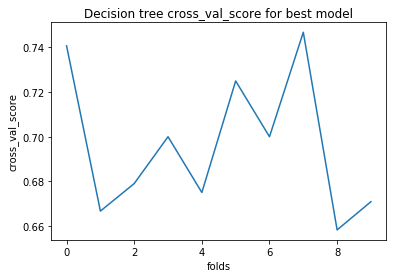

In [8]:
decision_scores=cross_val_score(bestModel,X_train,Y_train,cv=10)
print(decision_scores)

mt.title('Decision tree cross_val_score for best model')
mt.plot(range(len(decision_scores)),decision_scores,label='cross_val_score')
mt.xlabel('folds')
mt.ylabel('cross_val_score')
mt.show()

In [9]:
joblib.dump(bestModel,'decisionTreeBestModel.joblib')

['decisionTreeBestModel.joblib']